In [3]:
# Julia / Initial Practice
# 2024.05.28

# References
# - [책] 줄리아 프로그래밍 (류대식,전기현 / 비제이퍼블릭 / 2024)
#   https://search.shopping.naver.com/book/catalog/47287220619
# - [블로그] 생새우초밥집 > 줄리아
#   https://freshrimpsushi.github.io/ko/categories/줄리아/

In [4]:
# 1. Calculation

println(1 + 20 + 4)
println(+(1, 20, 4))
println()

x = 2
println(2x)
println()

for i ∈ 0:0.2:2
    println("sin^2($i π) + cos^2($i π) = ", sin(i * π)^2 + cos(i * π)^2)
end
# What is the difference between sin() and sin.()?

25
25

4



sin^2(0.0 π) + cos^2(0.0 π) = 1.0


sin^2(0.2 π) + cos^2(0.2 π) = 1.0
sin^2(0.4 π) + cos^2(0.4 π) = 0.9999999999999999
sin^2(0.6 π) + cos^2(0.6 π) = 1.0
sin^2(0.8 π) + cos^2(0.8 π) = 1.0
sin^2(1.0 π) + cos^2(1.0 π) = 1.0
sin^2(1.2 π) + cos^2(1.2 π) = 0.9999999999999999
sin^2(1.4 π) + cos^2(1.4 π) = 1.0
sin^2(1.6 π) + cos^2(1.6 π) = 1.0
sin^2(1.8 π) + cos^2(1.8 π) = 1.0000000000000002
sin^2(2.0 π) + cos^2(2.0 π) = 1.0


In [5]:
# 2. Macro : @time @threads

using Base.Threads


# 2.1 @time

x = zeros(3)

@time for i ∈ 1:10_000
    x += rand(3)
end
println()


# 2.2 @threads

Threads.nthreads() = 16                    # no physical multi-core
println(Threads.nthreads())
println()

@time for i ∈ 1:20
    print(i, " ")
end
println()

@time @threads for i ∈ 1:20
    print(i, " ")
end
println()

  0.107893 seconds (148.09 k allocations: 10.412 MiB, 99.20% compilation time)

16

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20   0.000255 seconds (462 allocations: 11.062 KiB)



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

  0.182614 seconds (39.54 k allocations: 2.568 MiB, 95.79% compilation time)



In [6]:
# 3. Merge strings
println(join(["Hello", "World"], ""))
println("Hello" * "World")

HelloWorld
HelloWorld


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.577500e+02


      1       9.988221e+01      -5.786779e+01 |        2
      2       8.774180e+01      -1.214041e+01 |        2


      3       8.495218e+01      -2.789621e+00 |        2
      4       8.401278e+01      -9.394005e-01 |        2
      5       8.304698e+01      -9.657970e-01 |        2
      6       8.174960e+01      -1.297380e+00 |        2
      7       8.080638e+01      -9.432261e-01 |        2
      8       7.987358e+01      -9.327962e-01 |        2
      9       7.934436e+01      -5.292157e-01 |        2
     10       7.892131e+01      -4.230544e-01 |        2
     11       7.885567e+01      -6.564390e-02 |        0
     12       7.885567e+01       0.000000e+00 |        0
K-means converged with 12 iterations (objv = 78.85566582597659)



[6.853846153846153 5.005999999999999 5.88360655737705; 3.0769230769230766 3.428000000000001 2.740983606557377; 5.715384615384615 1.4620000000000002 4.388524590163935; 2.053846153846153 0.2459999999999999 1.4344262295081966]



[39, 50, 61]



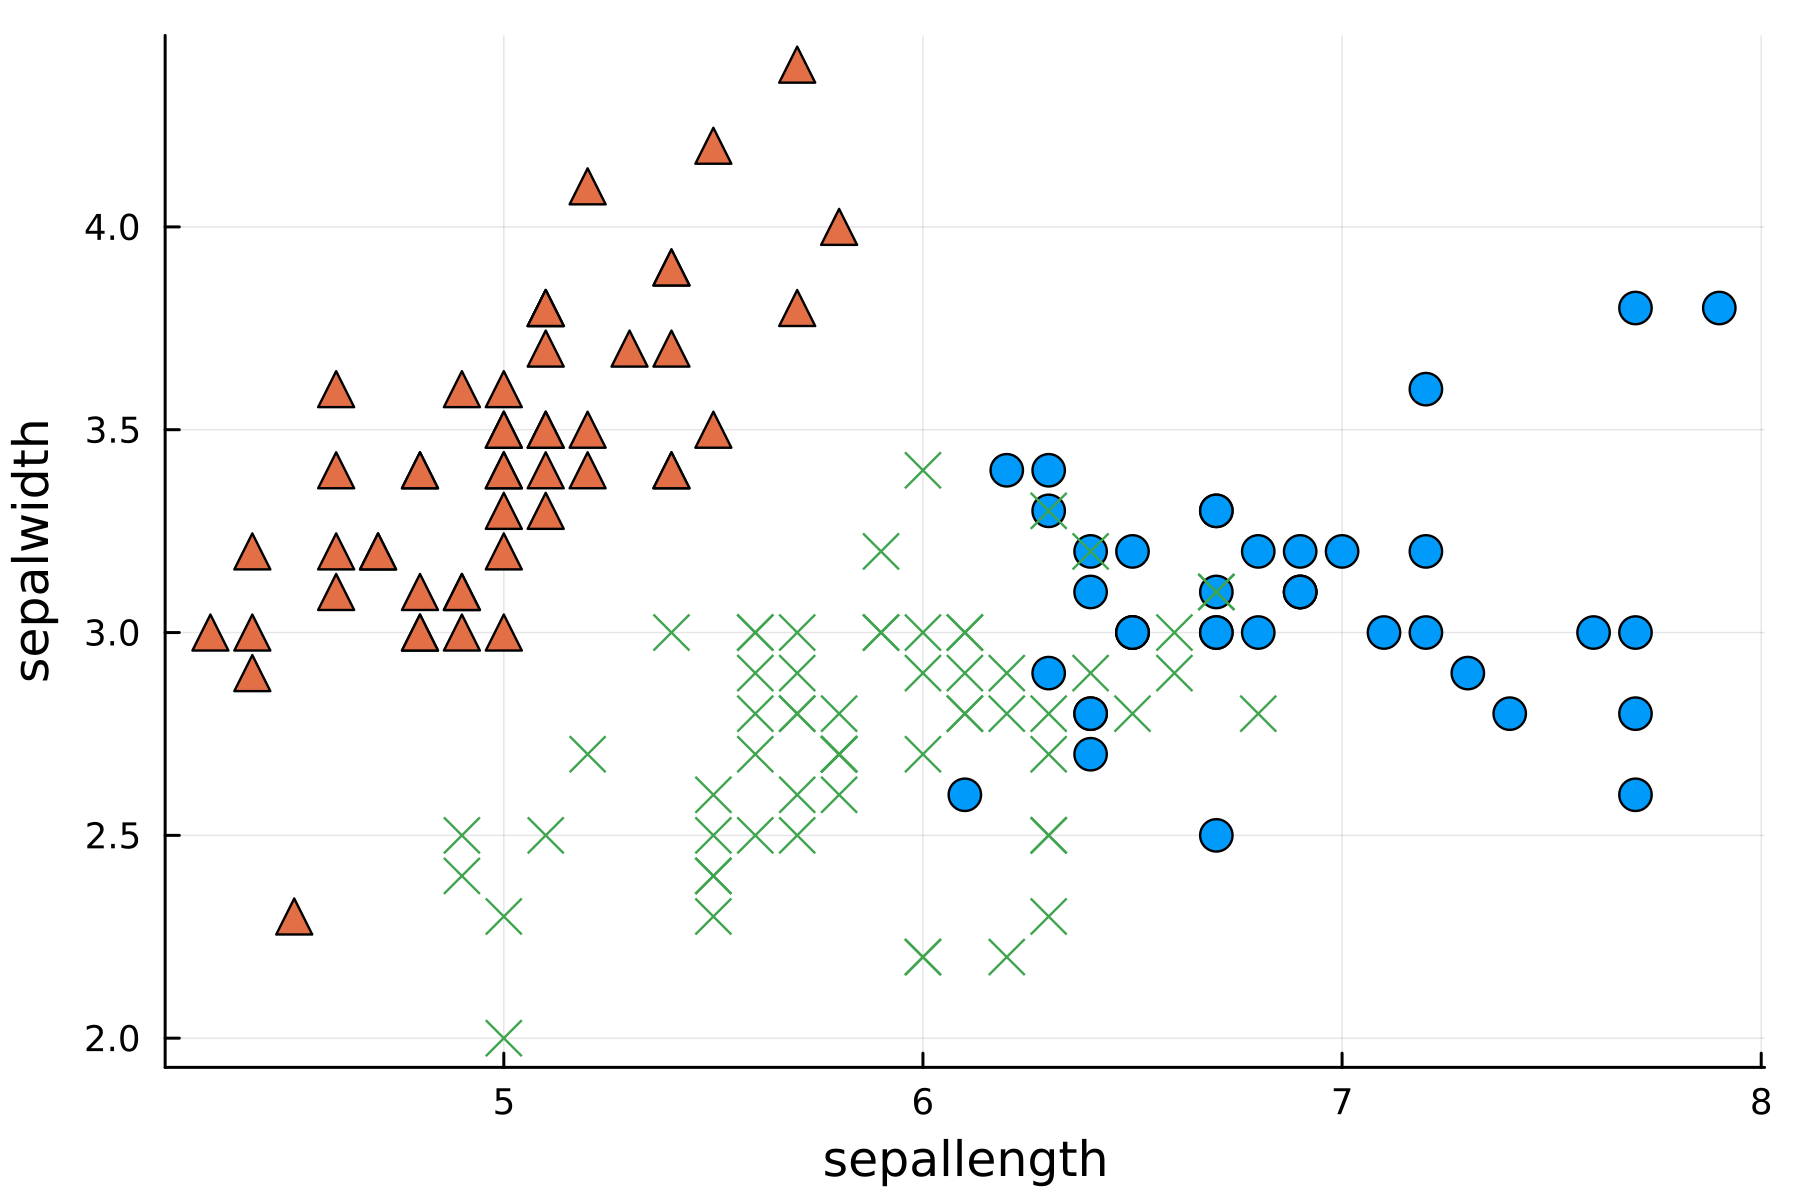

"iris_kmeans.png"

In [7]:
# 4. K-means Clustering
# https://freshrimpsushi.github.io/ko/posts/3572/

using RDatasets, Clustering, Plots

# RDatasets.datasets()                                     # list datasets in RDatasets
data = dataset("datasets", "iris")[:, 1:4]
data = Array(data)'

results = kmeans(data, 3, display=:iter)
println()
println(results.centers)
println()
println(results.counts)
println()

names = ["sepallength", "sepalwidth"]                      # hope to call them from the dataset but ……
markers = [:circle, :utriangle, :xcross]

p = plot(dpi = 300, legend = :none)
for i in 1:3
    i_cluster = findall(x -> x == i, results.assignments)
    scatter!(
        p, data[1, i_cluster], data[2, i_cluster],
        marker = markers[i],
        ms = 6,
        xlabel = names[1],
        ylabel = names[2]
    )
end
display(p)

png(p, "Images/iris_kmeans.png")

In [8]:
# 5. Regression
# https://freshrimpsushi.github.io/ko/posts/2493/#fn:1

using GLM, RDatasets

faithful = dataset("datasets", "faithful")

out1 = lm(@formula(Waiting ~ Eruptions), faithful)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Waiting ~ 1 + Eruptions

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  33.4744    1.15487   28.99    <1e-84    31.2007    35.7481
Eruptions    10.7296    0.314753  34.09    <1e-99    10.11      11.3493
───────────────────────────────────────────────────────────────────────

In [9]:
# 6. Animated Plotting
# https://freshrimpsushi.github.io/ko/posts/3556/

using Plots

θ = range(0, 2π, length=100)
x = sin.(2θ * 2)
y = cos.(2θ * 2)
z = θ

anim = @animate for i ∈ 0:3:360
    plot(x, y, z, xlabel="x", ylabel="y", zlabel="z", camera=(i,30), title="azimuth = $i")
end
gif(anim, "Images/helix.gif", fps=50)

[ Info: Saved animation to /home/user/helix.gif
